# Desafio 0

### Bibliotecas

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Leitura

In [2]:
train = pd.read_csv('train.csv').set_index('NU_INSCRICAO')
test = pd.read_csv('test.csv').set_index('NU_INSCRICAO')

### Seleção

In [3]:
numerical_train_columns = train.select_dtypes(include=np.number).columns
numerical_test_columns = test.select_dtypes(include=np.number).columns
columns = numerical_train_columns.intersection(numerical_test_columns)
columns = columns.to_list()
target = ['NU_NOTA_MT']

train = train[columns + target]
test = test[columns]

In [4]:
columns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

train = train[columns + target]
test = test[columns]

In [5]:
train.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
NU_INSCRICAO,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,436.3,495.4,581.2,520.0,399.4
2c3acac4b33ec2b195d77e7c04a2d75727fad723,474.5,544.1,599.0,580.0,459.8
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN,NaN,NaN,NaN
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN,NaN,NaN,NaN
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN,NaN,NaN,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       10341 non-null  float64
 1   NU_NOTA_CH       10341 non-null  float64
 2   NU_NOTA_LC       10133 non-null  float64
 3   NU_NOTA_REDACAO  10133 non-null  float64
 4   NU_NOTA_MT       10133 non-null  float64
dtypes: float64(5)
memory usage: 643.6+ KB


In [7]:
train.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
count,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000
mean,473.495155,529.661087,516.472841,529.048258,482.497928
std,71.093674,73.726344,68.688190,154.294758,99.826323
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.900000,480.400000,468.100000,440.000000,408.900000
50%,459.800000,532.000000,520.900000,540.000000,461.200000
75%,514.500000,581.200000,564.900000,600.000000,537.600000
max,806.400000,807.000000,763.600000,1000.000000,952.000000


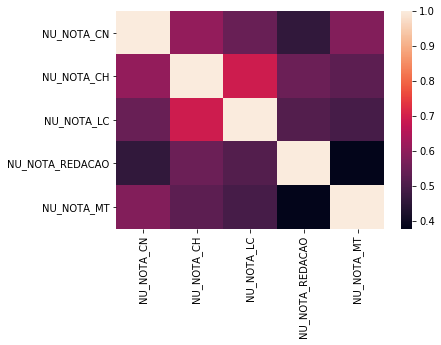

In [8]:
sns.heatmap(train.corr());

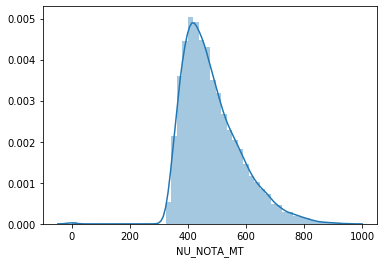

In [9]:
sns.distplot(train['NU_NOTA_MT']);

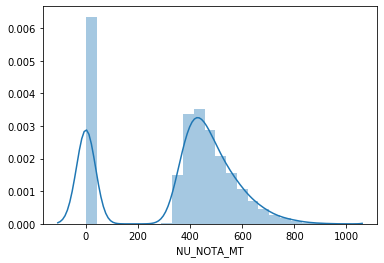

In [10]:
sns.distplot(train['NU_NOTA_MT'].fillna(0));

### Treinamento

In [11]:
train = train.dropna()
X = train.iloc[:, :-1].to_numpy()
y = train.iloc[:,  -1].to_numpy()

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.score(X, y) # R^2

0.401102106966471

### Predição

In [14]:
def student_validation(df):
  isna = df.isna().any(axis=1)
  df['NU_NOTA_MT'][isna] = 0
  return df['NU_NOTA_MT']

(test
  .assign(NU_NOTA_MT = model.predict(test.fillna(0).to_numpy()))
  .assign(NU_NOTA_MT = lambda df: student_validation(df))
  [['NU_NOTA_MT']].round(1)
  .to_csv('answer.csv'))